<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D1%86%D0%B5%D0%BD%D1%8B_%D0%BD%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

In [2]:
df = pd.read_csv("/content/archive (36).zip")
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [3]:
print("samples:", len(df))
print()
print("nulls:")
print(df.isnull().sum())

samples: 22000

nulls:
Name     0
Year     0
Miles    0
Price    0
dtype: int64


[]

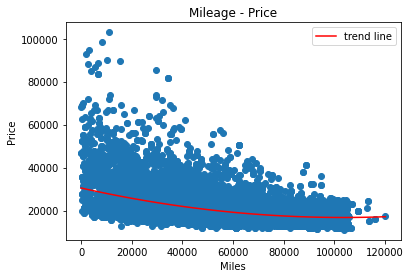

In [4]:
x = df.Miles
y = df.Price
a, b, c = np.polyfit(x, y, 2)

plt.scatter(x, y)
x = np.linspace(0, x.max(), 100)
plt.plot(x, a*(x**2)+b*x+c, color='red', label="trend line")
plt.title("Mileage - Price")
plt.xlabel("Miles")
plt.ylabel("Price")
plt.legend()
plt.plot()

In [5]:
df.Year.max()

20223500

In [6]:
years = list()
for val in df.Year:
    if val > 2000 and val < 2030:
        years.append(val)
    else:
        years.append(np.nan)
df.Year = years

In [7]:
df.Year.value_counts()

2015.0    2542
2019.0    2281
2017.0    2152
2016.0    2107
2014.0    2053
2018.0    1684
2020.0    1232
2021.0    1160
2012.0    1149
2013.0    1126
2010.0     599
2011.0     556
2022.0     356
2009.0     150
2023.0       2
Name: Year, dtype: int64

In [8]:
X = df[["Name", "Year", "Miles"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vec = TfidfVectorizer()
embeddings = vec.fit_transform(X_train.Name)
temp_X_train = pd.DataFrame(embeddings.todense(), columns=vec.get_feature_names_out())
temp_X_train["Year"] = X_train["Year"]
temp_X_train["Miles"] = X_train["Miles"]
X_train = temp_X_train

embeddings = vec.transform(X_test.Name)
temp_X_test = pd.DataFrame(embeddings.todense(), columns=vec.get_feature_names_out())
temp_X_test["Year"] = X_test["Year"]
temp_X_test["Miles"] = X_test["Miles"]
X_test = temp_X_test

In [10]:
params = {
    "boosting_type": "gbdt",
    "objective": "mse",

    "learning_rate": 0.3,
    "max_depth": -1,
    "colsample_bytree": .85,
    "subsample": .85,

    "num_boost_round": 10000,
    
    "random_state": 42,
    "n_jobs": -1,
}

model = lgb.LGBMRegressor(**params)

In [11]:
model.fit(X_train, y_train)
oos = model.predict(X_test)
print()
print('rmse:', np.sqrt(mean_squared_error(y_test, oos)))

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



rmse: 4633.604432984228
